In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

In [2]:
etf_df = pd.read_csv('output/ETF_months.csv')
oil_df = pd.read_csv('output/oil_data_months.csv')

In [3]:
etf_df.head()

,Date,ETF name,Open,High,Low,Close,Volume
0,2018-04,DRIV,14.388566,14.508866,14.388566,14.473818,57400
1,2018-04,DRIV,14.388566,14.508866,14.388566,14.473818,6200
2,2018-04,DRIV,14.502237,14.502237,14.341206,14.359203,817400
3,2018-04,DRIV,14.341206,14.341206,14.175439,14.205750,72200
4,2018-04,DRIV,14.237008,14.237008,14.047560,14.066505,14200


In [4]:
oil_df.head()

,Date,Average Price,Percent Change(month)
0,2003-01,30.336364,0.000000
1,2003-02,31.643500,1.250407
2,2003-03,29.440000,-3.481765
3,2003-04,25.239048,-2.700220
4,2003-05,25.629545,2.773187


In [5]:
oil_df.rename(columns={'Average Price': 'Average Price of Oil', 'Percent Change(month)': 'Percent Change Price of Oil'}, inplace=True)
oil_df

,Date,Average Price of Oil,Percent Change Price of Oil
0,2003-01,30.336364,0.000000
1,2003-02,31.643500,1.250407
2,2003-03,29.440000,-3.481765
3,2003-04,25.239048,-2.700220
4,2003-05,25.629545,2.773187
...,...,...,...
230,2022-03,113.476522,2.040622
231,2022-04,105.636500,0.046408
232,2022-05,113.870909,3.045652
233,2022-06,117.723636,-1.313486


In [6]:
merge_df = pd.merge(etf_df, oil_df, on='Date', how='inner')
merge_df

,Date,ETF name,Open,High,Low,Close,Volume,Average Price of Oil,Percent Change Price of Oil
0,2018-04,DRIV,14.388566,14.508866,14.388566,14.473818,57400,68.427143,1.641870
1,2018-04,DRIV,14.388566,14.508866,14.388566,14.473818,6200,68.427143,1.641870
2,2018-04,DRIV,14.502237,14.502237,14.341206,14.359203,817400,68.427143,1.641870
3,2018-04,DRIV,14.341206,14.341206,14.175439,14.205750,72200,68.427143,1.641870
4,2018-04,DRIV,14.237008,14.237008,14.047560,14.066505,14200,68.427143,1.641870
...,...,...,...,...,...,...,...,...,...
7618,2017-11,LIT,37.018936,37.156588,36.982228,37.119881,395900,60.739091,0.950965
7619,2017-11,LIT,36.982229,37.129057,36.752811,36.761990,623200,60.739091,0.950965
7620,2017-11,LIT,36.752815,36.908821,36.532575,36.908821,477300,60.739091,0.950965
7621,2017-11,LIT,37.000580,37.110699,36.220559,36.358208,714100,60.739091,0.950965


In [7]:
driv = merge_df.loc[merge_df['ETF name'] == 'DRIV']

driv_month = driv.groupby('Date').mean()

driv_month_av = driv.groupby('Date')['High'].mean()
driv_month_volume = driv.groupby('Date')['Volume'].sum()
driv_month_oil_price = driv.groupby('Date')['Average Price of Oil'].mean()
driv_month_oil_pc = driv.groupby('Date')['Percent Change Price of Oil'].mean()
driv_month

,Open,High,Low,Close,Volume,Average Price of Oil,Percent Change Price of Oil
Date,,,,,,,
2018-04,14.238903,14.277172,14.103922,14.155357,1.005400e+05,68.427143,1.641870
2018-05,14.417458,14.468911,14.351324,14.411861,1.288182e+04,74.113043,1.347226
2018-06,14.468316,14.496056,14.375441,14.430246,1.027619e+04,73.220476,0.139665
2018-07,14.022301,14.054823,13.943139,13.999748,4.919048e+03,73.266364,-0.598837
2018-08,13.927921,13.981378,13.872528,13.932410,3.739130e+03,72.257391,0.662320
2018-09,13.919384,13.964204,13.879700,13.914698,3.747368e+03,77.179000,1.515712
2018-10,13.030844,13.096244,12.895183,12.956341,1.587391e+04,79.386957,-1.761414
2018-11,12.519032,12.576724,12.451733,12.511319,3.052381e+03,65.332273,-4.944444
2018-12,11.744991,11.796348,11.608461,11.665007,7.605263e+03,56.943333,-2.092234


In [8]:
# driv_month_av

In [9]:
# driv_month_volume

In [10]:
# driv_month_oil_price

In [11]:
# driv_month_oil_pc

In [12]:
driv_summary = pd.DataFrame({'ETF': 'DRIV',
                             'High': driv_month_av,
                            'Volume': driv_month_volume,
                            'Price of Oil': driv_month_oil_price,
                            'Price of Oil (Percent Change)': driv_month_oil_pc})
driv_summary

,ETF,High,Volume,Price of Oil,Price of Oil (Percent Change)
Date,,,,,
2018-04,DRIV,14.277172,1005400,68.427143,1.641870
2018-05,DRIV,14.468911,283400,74.113043,1.347226
2018-06,DRIV,14.496056,215800,73.220476,0.139665
2018-07,DRIV,14.054823,103300,73.266364,-0.598837
2018-08,DRIV,13.981378,86000,72.257391,0.662320
2018-09,DRIV,13.964204,71200,77.179000,1.515712
2018-10,DRIV,13.096244,365100,79.386957,-1.761414
2018-11,DRIV,12.576724,64100,65.332273,-4.944444
2018-12,DRIV,11.796348,144500,56.943333,-2.092234


In [13]:
lit = merge_df.loc[merge_df['ETF name'] == 'LIT']

lit_av = lit.groupby('Date').mean()



lit_month_high = lit.groupby('Date')['High'].mean()
lit_month_volume = lit.groupby('Date')['Volume'].sum()
lit_oil_price = lit.groupby('Date')['Average Price of Oil'].mean()
lit_oil_pc = lit.groupby('Date')['Percent Change Price of Oil'].mean()

# lit_av

lit_summary = pd.DataFrame({'ETF': 'LIT',
                           'High': lit_month_high,
                           'Volume': lit_month_volume,
                           'Price of Oil': lit_oil_price,
                           'Price of Oil (Percent Change)': lit_oil_pc})
lit_summary

,ETF,High,Volume,Price of Oil,Price of Oil (Percent Change)
Date,,,,,
2010-07,LIT,28.256132,733750,72.507273,0.588771
2010-08,LIT,28.577321,1038450,74.151818,-0.602983
2010-09,LIT,30.677597,960600,74.634545,1.546899
2010-10,LIT,33.507305,1547000,79.857143,0.525813
2010-11,LIT,35.050265,1755300,82.834091,1.171745
...,...,...,...,...,...
2022-03,LIT,73.680171,16805100,113.476522,2.040622
2022-04,LIT,72.189528,14682300,105.636500,0.046408
2022-05,LIT,69.541757,16602900,113.870909,3.045652


In [14]:
idrv = merge_df.loc[merge_df['ETF name'] == 'IDRV']

idrv_av = idrv.groupby('Date').mean()

idrv_month_high = idrv.groupby('Date')['High'].mean()
idrv_month_volume = idrv.groupby('Date')['Volume'].sum()
idrv_oil_price = idrv.groupby('Date')['Average Price of Oil'].mean()
idrv_oil_pc = idrv.groupby('Date')['Percent Change Price of Oil'].mean()

idrv_summary = pd.DataFrame({'ETF': 'IDRV',
                            'High': idrv_month_high,
                            'Volume': idrv_month_volume,
                            'Price of Oil': idrv_oil_price,
                            'Price of Oil (Percent Change)': idrv_oil_pc})
idrv_summary

,ETF,High,Volume,Price of Oil,Price of Oil (Percent Change)
Date,,,,,
2019-04,IDRV,24.523455,3800,70.784762,1.461847
2019-05,IDRV,22.621481,25600,69.965652,-2.481991
2019-06,IDRV,22.306188,16000,62.917000,0.452065
2019-07,IDRV,23.267839,19900,64.706957,-0.024543
2019-08,IDRV,22.032767,21500,59.620000,-1.819625
2019-09,IDRV,23.308952,6300,62.356667,0.342372
2019-10,IDRV,23.655497,36900,59.908696,-0.214601
2019-11,IDRV,25.601940,39000,62.944762,1.148546
2019-12,IDRV,26.074341,60100,66.479048,1.358765


In [15]:
kars = merge_df.loc[merge_df['ETF name'] == 'KARS']

kars_av = kars.groupby('Date').mean()

kars_high = kars.groupby('Date')['High'].mean()
kars_volume = kars.groupby('Date')['Volume'].sum()
kars_oil_price = kars.groupby('Date')['Average Price of Oil'].mean()
kars_oil_pc= kars.groupby('Date')['Percent Change Price of Oil'].mean()

kars_summary = pd.DataFrame({'ETF': 'KARS',
                            'High': kars_high,
                            'Volume': kars_volume,
                            'Price of Oil': kars_oil_price,
                            'Price of Oil (Percent Change)': kars_oil_pc})
kars_summary

,ETF,High,Volume,Price of Oil,Price of Oil (Percent Change)
Date,,,,,
2018-01,KARS,22.738214,213200,66.852727,0.617652
2018-02,KARS,22.001764,548200,63.477500,-0.697043
2018-03,KARS,22.136984,275000,63.757619,0.623730
2018-04,KARS,21.283952,202500,68.427143,1.641870
2018-05,KARS,21.343570,155300,74.113043,1.347226
2018-06,KARS,21.379993,129200,73.220476,0.139665
2018-07,KARS,20.366907,127100,73.266364,-0.598837
2018-08,KARS,20.010910,69500,72.257391,0.662320
2018-09,KARS,19.938354,47000,77.179000,1.515712


In [16]:
hail = merge_df.loc[merge_df['ETF name'] == 'HAIL']

hail_high = hail.groupby('Date')['High'].mean()
hail_volume = hail.groupby('Date')['Volume'].sum()
hail_oil_price = hail.groupby('Date')['Average Price of Oil'].mean()
hail_oil_pc = hail.groupby('Date')['Percent Change Price of Oil'].mean()

hail_summary = pd.DataFrame({'ETF': 'HAIL',
                            'High': hail_high,
                            'Volume': hail_volume,
                            'Price of Oil': hail_oil_price,
                            'Price of Oil (Percent Change)': hail_oil_pc})
hail_summary

,ETF,High,Volume,Price of Oil,Price of Oil (Percent Change)
Date,,,,,
2017-12,HAIL,28.094998,21200,62.062000,1.116934
2018-01,HAIL,29.640772,117700,66.852727,0.617652
2018-02,HAIL,28.601481,10600,63.477500,-0.697043
2018-03,HAIL,28.672695,12900,63.757619,0.623730
2018-04,HAIL,27.923829,30400,68.427143,1.641870
2018-05,HAIL,28.350208,44700,74.113043,1.347226
2018-06,HAIL,29.018688,44400,73.220476,0.139665
2018-07,HAIL,28.475105,21100,73.266364,-0.598837
2018-08,HAIL,28.803253,29900,72.257391,0.662320


Text(0.5, 1.0, 'HAIL Average Stock Price High (monthly) vs. Price of Oil (monthly)')

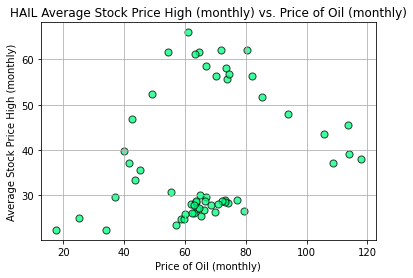

In [17]:
# plotting 
x_hail_oil_price = hail_summary['Price of Oil']
y_hail_high = hail_summary['High']

plt.scatter(x_hail_oil_price, y_hail_high, marker='o', facecolors='springgreen', edgecolors='black', s=50, alpha=0.75)
plt.grid()
plt.xlabel('Price of Oil (monthly)')
plt.ylabel('Average Stock Price High (monthly)')
plt.title('HAIL Average Stock Price High (monthly) vs. Price of Oil (monthly)')

Text(0.5, 1.0, 'HAIL Average Stock Price High (month) vs. Price of Oil (Percent Change each month)')

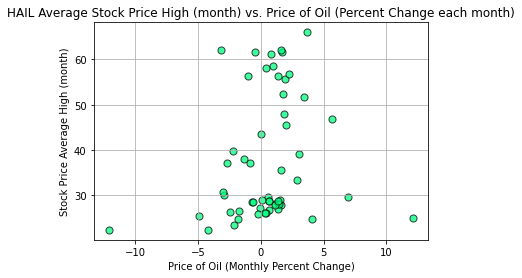

In [18]:

x_hail_oil_pc = hail_summary['Price of Oil (Percent Change)']
# y hail high

plt.scatter(x_hail_oil_pc, y_hail_high, marker='o', facecolors='springgreen', edgecolors='black', s=50, alpha=0.75)
plt.grid()
plt.xlabel('Price of Oil (Monthly Percent Change)')
plt.ylabel('Stock Price Average High (month)')
plt.title('HAIL Average Stock Price High (month) vs. Price of Oil (Percent Change each month)')


Index(['2017-12', '2018-01', '2018-02', '2018-03', '2018-04', '2018-05',
       '2018-06', '2018-07', '2018-08', '2018-09', '2018-10', '2018-11',
       '2018-12', '2019-01', '2019-02', '2019-03', '2019-04', '2019-05',
       '2019-06', '2019-07', '2019-08', '2019-09', '2019-10', '2019-11',
       '2019-12', '2020-01', '2020-02', '2020-03', '2020-04', '2020-05',
       '2020-06', '2020-07', '2020-08', '2020-09', '2020-10', '2020-11',
       '2020-12', '2021-01', '2021-02', '2021-03', '2021-04', '2021-05',
       '2021-06', '2021-07', '2021-08', '2021-09', '2021-10', '2021-11',
       '2021-12', '2022-01', '2022-02', '2022-03', '2022-04', '2022-05',
       '2022-06', '2022-07'],
      dtype='object', name='Date')

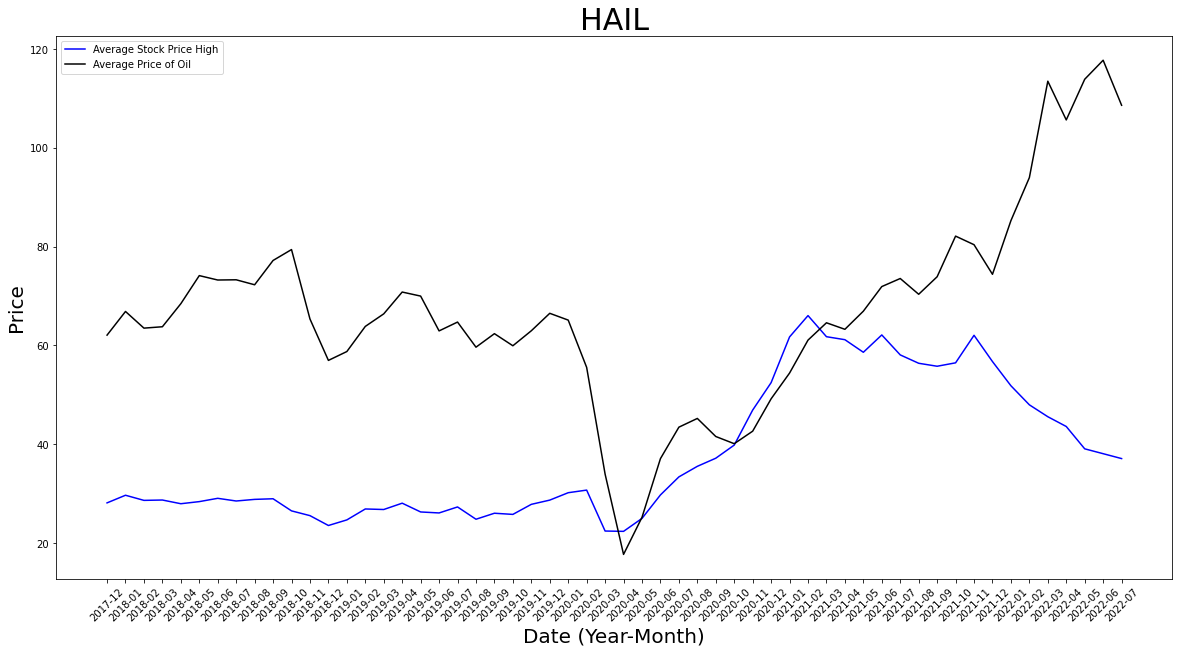

In [39]:
x_hail_index = hail_summary.index

plt.figure(figsize=(20,10))
av_high, = plt.plot(x_hail_index, y_hail_high, color='blue', label='Average Stock Price High')
av_oil, = plt.plot(x_hail_index, x_hail_oil_price, color='black', label="Average Price of Oil")
plt.xticks(rotation=45)
plt.title('HAIL', fontsize=30)
plt.xlabel('Date (Year-Month)', fontsize=20)
plt.ylabel('Price', fontsize=20)
plt.legend(handles=[av_high, av_oil], loc='best')
plt.show()

In [20]:
vcar = merge_df.loc[merge_df['ETF name'] == 'VCAR']

vcar_high = vcar.groupby('Date')['High'].mean()
vcar_volume = vcar.groupby('Date')['Volume'].sum()
vcar_oil_price = vcar.groupby('Date')['Average Price of Oil'].mean()
vcar_oil_pc = vcar.groupby('Date')['Percent Change Price of Oil'].mean()

vcar_summary = pd.DataFrame({'ETF': 'VCAR',
                            'High': vcar_high,
                            'Volume': vcar_volume,
                            'Price of Oil': vcar_oil_price,
                            'Price of Oil (Percent Change)': vcar_oil_pc})
vcar_summary

,ETF,High,Volume,Price of Oil,Price of Oil (Percent Change)
Date,,,,,
2020-12,VCAR,12.958034,49000,49.167273,1.805298
2021-01,VCAR,15.000368,337500,54.381000,1.660032
2021-02,VCAR,13.943620,150000,61.052500,3.661092
2021-03,VCAR,11.843422,125500,64.560435,-0.464502
2021-04,VCAR,12.017206,176000,63.240952,0.782464
2021-05,VCAR,10.760897,180900,66.909524,0.998319
2021-06,VCAR,11.075765,37000,71.893636,1.627608
2021-07,VCAR,11.566553,53900,73.525455,0.412500
2021-08,VCAR,11.752902,23000,70.334091,-1.041611


Text(0.5, 1.0, 'VCAR Average Stock Price High (month) vs. Price of Oil (month)')

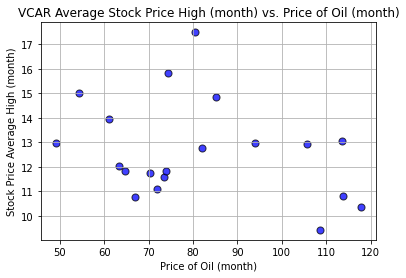

In [21]:
# VCAR Scatter plot (Average Stock High vs. Price of Oil)
x_vcar_oil_price = vcar_summary['Price of Oil']
y_vcar_high = vcar_summary['High']

plt.scatter(x_vcar_oil_price, y_vcar_high, marker='o', facecolors='blue', edgecolors='black', s=50, alpha=0.75)
plt.grid()
plt.xlabel('Price of Oil (month)')
plt.ylabel('Stock Price Average High (month)')
plt.title('VCAR Average Stock Price High (month) vs. Price of Oil (month)')

Text(0.5, 1.0, 'VCAR Average Stock Price High (month) vs. Price of Oil (Percent Change each month)')

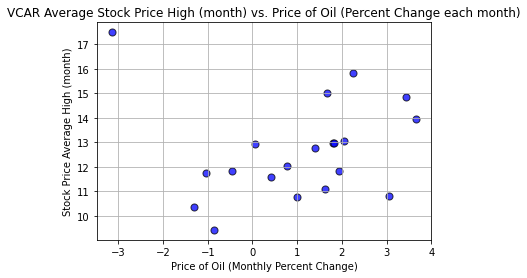

In [22]:
# VCAR Scatter plot (Average Stock Price High (month) vs. Price of Oil (Percent Change each month))

x_vcar_oil_pc = vcar_summary['Price of Oil (Percent Change)']
# y is still stock price high 

plt.scatter(x_vcar_oil_pc, y_vcar_high, marker='o', facecolors='blue', edgecolors='black', s=50, alpha=0.75)
plt.grid()
plt.xlabel('Price of Oil (Monthly Percent Change)')
plt.ylabel('Stock Price Average High (month)')
plt.title('VCAR Average Stock Price High (month) vs. Price of Oil (Percent Change each month)')
